## KNN Approach



### Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

from pathlib import Path
import os

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result,plot_2d_prediction


2024-05-06 21:04:20.014350: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-06 21:04:20.042904: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 21:04:20.042930: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 21:04:20.043733: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-06 21:04:20.049546: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# read dynamic path
base_dir = Path(os.getcwd())/"implementation"
data_dir = base_dir / "data/source/"
result_dir = base_dir / "data/results/"

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [3]:
nn_data_raw_train = pd.read_csv(data_dir / "ACHE/ache_smote_train.csv")
nn_data_raw_test = pd.read_csv(data_dir / "ACHE/ache_smote_test.csv")

In [4]:
nn_data_train = {'data': np.array(nn_data_raw_train.iloc[:, 2:-1]),
             'target': np.array(nn_data_raw_train.iloc[0:,-1]),
             'feature_names': nn_data_raw_train.columns[2:-1],
             'target_names': ['inactive', 'active']}

nn_data_test = {'data': np.array(nn_data_raw_test.iloc[:, 2:-1]),
             'target': np.array(nn_data_raw_test.iloc[0:,-1]),
             'feature_names': nn_data_raw_test.columns[2:-1],
             'target_names': ['inactive', 'active']}



### train and apply neural network

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data_train['data'].shape[1], )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

2024-05-06 21:04:22.471642: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:04:22.616045: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:04:22.616201: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:04:22.636640: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:04:22.636815: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 136       
                                                                 
Total params: 136 (544.00 Byte)
Trainable params: 136 (544.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/150


2024-05-06 21:04:25.587851: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-06 21:04:27.330547: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f91fdadc6d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-06 21:04:27.330585: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-05-06 21:04:27.342257: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-06 21:04:27.432610: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1715022267.769578   29252 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


36/36 - 5s - loss: 0.7168 - accuracy: 0.4920 - val_loss: 0.7096 - val_accuracy: 0.5248 - 5s/epoch - 141ms/step
Epoch 2/150
36/36 - 0s - loss: 0.6841 - accuracy: 0.5544 - val_loss: 0.6849 - val_accuracy: 0.5532 - 466ms/epoch - 13ms/step
Epoch 3/150
36/36 - 1s - loss: 0.6556 - accuracy: 0.6132 - val_loss: 0.6655 - val_accuracy: 0.6028 - 615ms/epoch - 17ms/step
Epoch 4/150
36/36 - 1s - loss: 0.6314 - accuracy: 0.6506 - val_loss: 0.6467 - val_accuracy: 0.6525 - 659ms/epoch - 18ms/step
Epoch 5/150
36/36 - 1s - loss: 0.6109 - accuracy: 0.6791 - val_loss: 0.6321 - val_accuracy: 0.6596 - 643ms/epoch - 18ms/step
Epoch 6/150
36/36 - 1s - loss: 0.5925 - accuracy: 0.6934 - val_loss: 0.6174 - val_accuracy: 0.6879 - 681ms/epoch - 19ms/step
Epoch 7/150
36/36 - 1s - loss: 0.5755 - accuracy: 0.7201 - val_loss: 0.6054 - val_accuracy: 0.6950 - 649ms/epoch - 18ms/step
Epoch 8/150
36/36 - 1s - loss: 0.5606 - accuracy: 0.7469 - val_loss: 0.5941 - val_accuracy: 0.7092 - 693ms/epoch - 19ms/step
Epoch 9/150
36

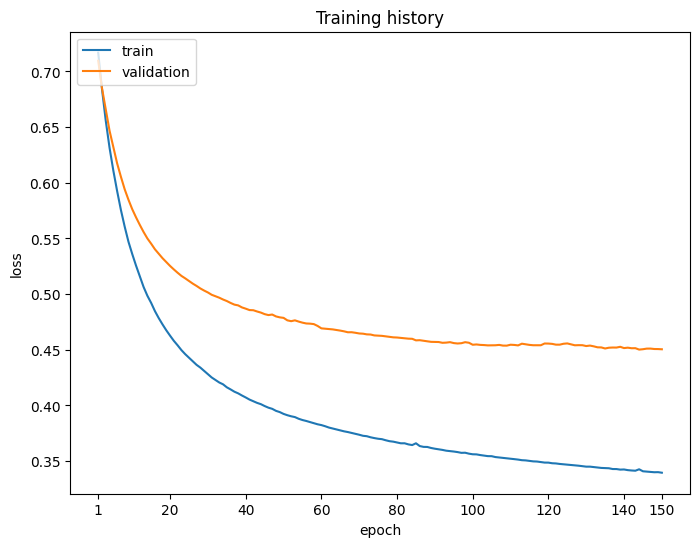

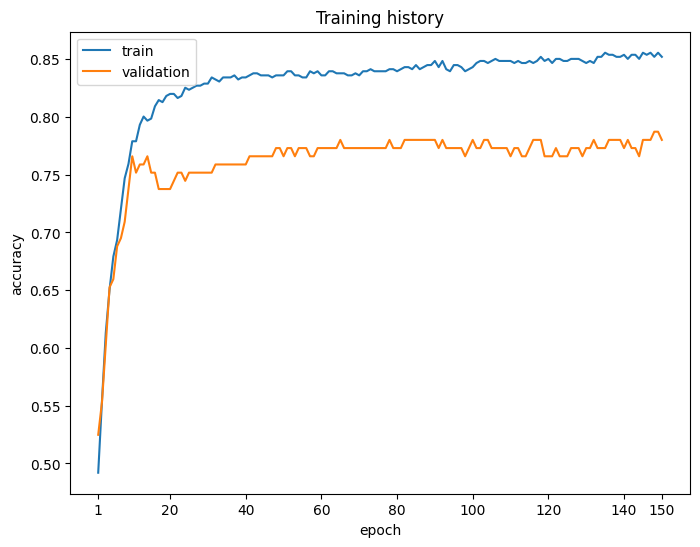

In [6]:
history = model.fit(x=nn_data_train["data"], y=nn_data_train["target"], epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

In [9]:
df = pd.read_csv(result_dir/"ACHE/val/ache_val.csv",sep=",",index_col="Index")
df.loc[len(df["Name"])] = ["fe_smote_nn",0.7801]
df.to_csv(result_dir/"ACHE/val/ache_val.csv",sep=",",index="Index")

### Evaluate Testdata using model

In [7]:
pred = model.predict(nn_data_test["data"])
classes= [1 if i > 0.5  else 0 for i in pred]


10/10 [==============================] - 0s 1ms/step


### Prepare Data for evaluation

In [8]:
result_df = pd.DataFrame(columns=nn_data_raw_train.columns[:-1])

for i, row in enumerate(nn_data_test["data"]):
    data = [i,i]
    data.extend(row)
    result_df.loc[i+1] = data

result_df["LABEL"] = nn_data_test["target"]
result_df["PRED"] = classes

result_df.to_csv(result_dir / "ACHE/fe_smote_nn.csv", encoding="utf-8")